# FRACTALNET: ULTRA-DEEP NEURAL NETWORKS WITHOUT RESIDUALS (2017)

Fractalnet được giới thiệu bởi **Gustav Larsson** và cộng sự tại đại Học Chicago trong bài báo *ULTRA-DEEP NEURAL NETWORKS WITHOUT RESIDUALS* tại hội nghị ICLR 2017 với mục tiêu muốn mạng sâu hơn và hiệu quả hơn nhưng không sử dung *residual connection* nhằm chứng minh không có residual thì mạng vẫn có thể học hiệu quả với hiệu xuất tương đương hay cao hơn trong các bài toán và dữ liệu khác nhau.

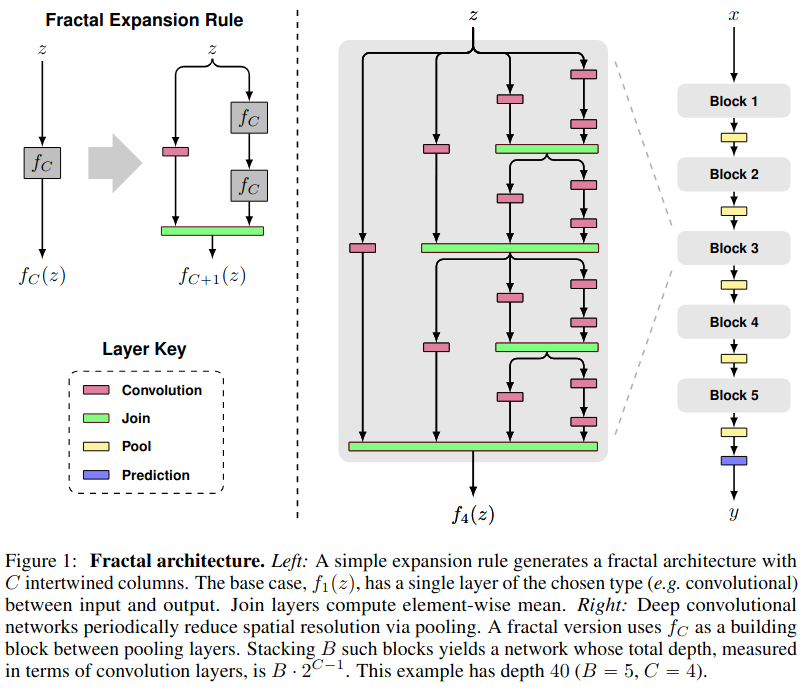

## abstraction

FractalNet giới thiệu một **chiến lược thiết kế** cho kiến trúc mạng nơ-ron dựa trên **tính tự đồng dạng** (self-similarity). Thông qua việc áp dụng lặp lại một quy tắc mở rộng đơn giản, FractalNet tạo ra các mạng sâu có cấu trúc được xây dựng theo dạng fractal. Những mạng này bao gồm các đường dẫn phụ với độ dài khác nhau nhưng **không sử dụng kết nối dư thừa** (residual connections); mọi tín hiệu bên trong đều được biến đổi qua bộ lọc và hàm phi tuyến trước khi đi qua các lớp kế tiếp.

Trong **thực nghiệm**, FractalNet đạt hiệu suất tương đương với các mạng residual tiêu chuẩn trên các tác vụ phân loại CIFAR và ImageNet, cho thấy rằng các kết nối dư thừa không nhất thiết là yếu tố cốt lõi cho thành công của các mạng nơ-ron tích chập cực kỳ sâu. Thay vào đó, khả năng **chuyển đổi từ cấu trúc nông sang cấu trúc sâu trong quá trình huấn luyện** có thể là yếu tố quan trọng.

FractalNet còn phát triển phương pháp **drop-path** – một mở rộng tự nhiên của dropout – để điều chuẩn việc thích ứng chung giữa các đường dẫn phụ trong kiến trúc fractal. Phương pháp điều chuẩn này giúp trích xuất các subnetworks có hiệu suất cao và độ sâu cố định. Ngoài ra, FractalNet còn có đặc tính **anytime**: các mạng con nông hơn cung cấp câu trả lời nhanh chóng, trong khi các mạng con sâu hơn, với độ trễ cao hơn, mang lại kết quả chính xác hơn.


## 1. Introduction

### Quan sát của Tác giả
- Tác giả nhận thấy rằng các mạng nơ-ron sâu trước đây, đặc biệt là **mạng residual (ResNet)**, đã tăng đáng kể độ sâu và độ chính xác của các mạng tích chập. Các mạng residual đạt hiệu suất cao nhờ vào việc sử dụng các kết nối dư thừa để học các ánh xạ không tuyệt đối, từ đó giảm khoảng cách tới mất mát (loss).
- Các mạng residual này có đặc điểm là các lớp gần như đồng nhất giúp giảm mất mát, điều này ngụ ý rằng các thuộc tính sâu của mạng có thể giúp mạng học tốt hơn và ổn định hơn.
- **FractalNet** là một kiến trúc mạng nơ-ron sâu cạnh tranh không sử dụng các kết nối dư thừa (residuals). Tác giả nhận thấy rằng việc học dư thừa không phải là yêu cầu bắt buộc để xây dựng các mạng nơ-ron sâu hiệu quả. FractalNet có thể đạt hiệu suất cao mà không cần đến kỹ thuật residual.
- **Nguyên tắc thiết kế** của FractalNet là "fractal" với mục tiêu đơn giản hóa thiết kế và giảm độ phức tạp, giúp mạng tự động hình thành các đặc tính như giám sát sâu (deep supervision) và học sinh-giáo viên (student-teacher learning) trong nội bộ mạng.
- Đối với mạng fractal, **đơn giản hóa trong quá trình huấn luyện** phản ánh sự đơn giản trong thiết kế. Chỉ cần một hàm loss duy nhất gắn liền với lớp cuối cũng có thể thúc đẩy hành vi học sâu bên trong mạng mà không cần phải khởi tạo phức tạp.


### Đóng góp của Tác giả
1. **Giới thiệu FractalNet**: Đây là một phương án thay thế đơn giản cho ResNet, chứng minh rằng việc học dư thừa (residual learning) không phải là điều kiện bắt buộc để xây dựng các mạng nơ-ron cực sâu.
2. **Kết nối giữa FractalNet và các hiện tượng khác**: Thông qua các phân tích và thí nghiệm, tác giả làm rõ các kết nối giữa FractalNet và các hiện tượng kỹ thuật đã được ứng dụng vào các thiết kế mạng sâu trước đó.
3. **Drop-Path**: Tác giả phát triển phương pháp điều chuẩn mới gọi là **drop-path**, giúp cải thiện hiệu suất của FractalNet. Phương pháp này không chỉ là một chiến lược điều chuẩn mà còn tạo ra các mạng fractal có khả năng cung cấp kết quả bất kỳ trong khi huấn luyện, ngăn ngừa việc các subnetworks có độ sâu khác nhau thích ứng cùng nhau.
4. **Hiệu quả trên các tập dữ liệu**: FractalNet, khi huấn luyện với drop-path và dropout, có thể vượt qua hiệu suất của các mạng residual được điều chuẩn bằng stochastic depth, ngay cả khi không sử dụng tăng cường dữ liệu (data augmentation).

### Phạm vi nghiên cứu
- **Nghiên cứu hành vi học sinh-giáo viên** của các mạng con (subnetwork) trong quá trình huấn luyện.
- **So sánh hiệu suất** giữa FractalNet và các mạng residual trên các tập dữ liệu như CIFAR-10, CIFAR-100, SVHN và ImageNet.
- **Đánh giá các mạng anytime** được tạo ra bằng phương pháp drop-path và cung cấp kiến thức sâu rộng về việc các thiết kế mạng fractal có thể trở thành cấu trúc cơ bản của các kiến trúc mạng nơ-ron.



## 2. Relate work
### Tăng Chiều Sâu Của Mạng Nơ-ron Feed-Forward

Việc tăng chiều sâu của mạng nơ-ron feed-forward đã cho thấy sự cải thiện đáng kể về hiệu suất, đặc biệt trong các bài toán phân loại ảnh. Quá trình phát triển kiến trúc mạng từ AlexNet đến VGG, GoogLeNet, và cuối cùng là ResNet minh họa cách mà việc tăng độ sâu của mạng đã giúp đạt được kết quả tốt hơn trên các bộ dữ liệu tiêu chuẩn như ImageNet.
- **Thách Thức Khi Tăng Chiều Sâu**
    - **Khó khăn trong tối ưu hóa: Khi mạng trở nên sâu hơn, việc huấn luyện trở nên phức tạp hơn, đặc biệt khi sử dụng các phương pháp tối ưu hóa bậc nhất trên các lớp khởi tạo ngẫu nhiên. Bản chất phi tuyến của các mạng sâu khiến việc xấp xỉ tuyến tính của bước gradient trở nên kém hiệu quả. Điều này khuyến khích nghiên cứu cả về kỹ thuật tối ưu hóa và kiến trúc mạng.

- **Tiến Bộ Trong Tối Ưu Hóa**

    - Hàm kích hoạt: ReLU và các biến thể của nó như PReLUs và ELUs đã thay thế các hàm sigmoid và tanh, giúp luồng gradient hiệu quả hơn và giảm thiểu hiện tượng biến mất gradient.
    Chuẩn hóa Batch (Batch Normalization): Việc áp dụng chuẩn hóa batch giúp giảm thiểu sự (internal covariate shift), ổn định phân phối của các kích hoạt và làm mượt quá trình huấn luyện.
    Khởi tạo và Chuẩn hóa: Các kỹ thuật như Path-SGD và các phương pháp khởi tạo khác cung cấp các cách thay thế để chuẩn hóa mạng và cải thiện tối ưu hóa, cho thấy tiến bộ trong tối ưu hóa bổ sung cho sự phát triển kiến trúc.

- **Đổi Mới Trong Kiến Trúc**

    - Kết Nối tắt (Skip Connections): Các kết nối tắt ban đầu cung cấp các con đường cho gradient, giúp giảm thiểu hiện tượng gradient biến mất.
    Mạng Highway Networks và Residual Networks - ResNets: ResNet áp dụng kết nối tắt rõ ràng, mỗi khối dư (residual block) bao gồm ánh xạ đồng nhất để ổn định việc huấn luyện trong các mạng sâu hơn. Ngoài ra, cấu trúc này cho phép ResNet và Highway Networks hoạt động với "chiều sâu hiệu quả," đơn giản hóa luồng gradient và giảm các thách thức do chiều sâu gây ra.

- **stochastic depth và giới thiệu về Drop-Path Regularization**

    - Drop-Path Regularization: Một số nghiên cứu chỉ ra rằng việc điều chỉnh "độ sâu hiệu quả" của mạng Resnet thông qua stochastic depth có thể giúp các mô hình sâu đạt hiệu suất tốt hơn. Điều này được thực hiện bằng cách ngẫu nhiên loại bỏ các lớp trong quá trình huấn luyện, giúp giảm độ phức tạp của mạng và cải thiện khả năng tổng quát hóa.
    - (Deep Supervision): Kỹ thuật giám sát sâu, nơi các mất mát phụ được áp dụng cho các lớp trung gian, có thể giúp dẫn dắt quá trình học tập bằng cách tạo ra các đường ngắn hơn cho việc lan truyền ngược. Tuy nhiên, có một sự khác biệt giữa mục tiêu trong quá trình huấn luyện và khi kiểm thử, vì mất mát phụ không ảnh hưởng đến dự đoán khi kiểm thử.

- **Mô Hình Học Tập Học Sinh - Giáo Viên (Student-Teacher Paradigm)**

    - Nén Mô Hình và Hướng Dẫn Huấn Luyện: Mô hình học sinh-giáo viên tận dụng một mô hình giáo viên đã được huấn luyện để hướng dẫn một mô hình học sinh nhỏ hơn. Cách tiếp cận này giúp cải thiện hiệu quả và độ chính xác của quá trình học tập. Các phương pháp như FitNets và Fractal Networks nghiên cứu cách mà các mạng có độ sâu khác nhau tương tác, cho phép luồng thông tin hai chiều giữa các mạng con nông và sâu.

- **Mở Rộng Mạng và Ghép Module được giới thiệu trong bài báo này là việc mở rộng hơn so với kiến trúc inception**

    - Module-Based Widening: Sử dụng các module lớn hoặc "mở rộng" mạng thay vì chỉ xếp chồng các lớp có thể mang lại hiệu suất tốt hơn. Các module Inception, với khả năng ghép các lớp có kích thước vùng tiếp nhận khác nhau, là một ví dụ điển hình. Các kỹ thuật này giúp mạng nắm bắt mối quan hệ không gian hiệu quả trên nhiều quy mô khác nhau.

## Kiến Trúc Tổng Quát
Tác giả giới thiệu kiến trúc của FractalNet với ý tưởng mở rộng cấu trúc fractal để tạo ra các mạng sâu. Khung làm việc của FractalNet không chỉ giới hạn ở các lớp tích chập (convolutional layers) mà có thể thay thế bằng các loại lớp khác hoặc các module tùy chỉnh. Cấu trúc mạng được xây dựng dựa trên sự mở rộng đệ quy, trong đó các mạng con được kết nối để tạo ra độ sâu và chiều rộng cho mạng.

## Định Nghĩa Toán Học
- Ký hiệu `f_C(z)` đại diện cho mạng fractal bị cắt tại chỉ số `C`. Mạng con đơn giản nhất là `f_1(z) = conv(z)`, một lớp tích chập cơ bản.
- Mạng fractal mở rộng được định nghĩa đệ quy theo công thức:
  $$
  f_{C+1}(z) = \left( f_C \circ f_C \right)(z) \oplus [conv(z)]
  $$
  với `∘` biểu thị phép hợp thành và `⊕` biểu thị lớp kết hợp (join layer).

## Lớp Kết Hợp (Join Layer)
Lớp kết hợp `⊕` là phần quan trọng trong cấu trúc fractal, có nhiệm vụ hợp nhất các đặc trưng từ nhiều cột vào một đầu ra duy nhất. Một lớp kết hợp sẽ tính toán trung bình từng phần tử từ các đầu vào của nó. Lớp này có chức năng giống như việc kết hợp các tín hiệu, nhưng với một số khác biệt quan trọng so với các mạng ResNet:
  - **ResNet**: Phân biệt rõ ràng giữa các tín hiệu pass-through và tín hiệu residual, trong đó một tín hiệu chính được ưu tiên.
  - **FractalNet**: Không có tín hiệu nào được ưu tiên trong lớp kết hợp. Mỗi đầu vào cho lớp kết hợp đều đến từ đầu ra của lớp tích chập trước đó và không có tín hiệu nào là chính hay phụ.

## Sự Khác Biệt So Với Học Dư Thừa (Residual Learning)
- **Điều chuẩn Drop-path**: FractalNet sử dụng điều chuẩn drop-path để buộc mỗi đầu vào trong lớp kết hợp phải đáng tin cậy độc lập. Điều này làm giảm khả năng mạng học cách phân bổ một phần tín hiệu như một tín hiệu dư thừa.
- **Khả năng Trích Xuất Mạng Con**: Thí nghiệm cho thấy FractalNet có thể trích xuất các mạng con hiệu suất cao từ một cột duy nhất mà không cần đến lớp kết hợp. Các mạng con này không tạo ra tín hiệu mà một tín hiệu dư thừa có thể được thêm vào.

Những đặc tính trên đảm bảo rằng lớp kết hợp trong FractalNet không phải là một phương pháp thay thế cho học dư thừa, mà đóng vai trò riêng trong cấu trúc fractal.

## experiment

### Ý Đồ Thí Nghiệm
Tác giả thực hiện các thí nghiệm với FractalNet để so sánh hiệu suất của nó với các mạng sâu trước đó như ResNet trên các bộ dữ liệu CIFAR, SVHN, và ImageNet. Mục tiêu là để kiểm tra khả năng huấn luyện và hiệu suất của FractalNet khi không có kết nối dư thừa (residual connections), một thành phần quan trọng trong các mạng ResNet. Tác giả muốn chứng minh rằng độ dài của đường dẫn trong mạng nơ-ron sâu là yếu tố cốt lõi cho việc huấn luyện hiệu quả, không phải là sự hiện diện của các kết nối dư thừa.

### Thiết Lập Thí Nghiệm
- **CIFAR và SVHN**: Sử dụng mạng FractalNet với 5 khối (block) và áp dụng max-pooling 2x2 không chồng chéo để giảm kích thước không gian từ 32x32 xuống còn 1x1. Số lượng kênh lọc trong mỗi khối được thiết lập là (64, 128, 256, 512, 512) theo quy tắc tăng gấp đôi sau khi giảm độ phân giải không gian.
- **ImageNet**: Sử dụng cấu trúc fractal với 4 khối và mỗi khối chứa 8 lớp để so sánh trực tiếp với ResNet-34. Số lượng kênh lọc theo từng khối là (128, 256, 512, 1024).

### Kết Quả Thí Nghiệm
- **Drop-path**: Tác giả giới thiệu kỹ thuật điều chuẩn drop-path để giảm thiểu sự đồng điều chỉnh của các mạng con. Drop-path giúp giảm tỷ lệ lỗi của FractalNet mà không cần tăng cường dữ liệu. Drop-path cũng có thể được điều chỉnh để kiểm soát sự đánh đổi giữa độ trễ và độ chính xác.
- **Hiệu suất của FractalNet**: FractalNet đạt hiệu suất cao hơn ResNet khi không sử dụng dữ liệu tăng cường, đặc biệt là trên CIFAR-100 và SVHN. Với độ sâu mạng tăng lên, FractalNet vẫn duy trì hiệu suất ổn định và không bị giảm hiệu quả như các mạng khác.
- **Khả năng mở rộng**: FractalNet có khả năng mở rộng tốt hơn khi tăng số lượng lớp. Nó duy trì hiệu suất tốt ngay cả khi số lớp đạt 160, trong khi các mạng truyền thống bắt đầu suy giảm hiệu suất và khó hội tụ ở độ sâu tương tự.

### Kết Luận
Thí nghiệm này chỉ ra rằng kiến trúc fractal có thể đạt hiệu suất tương đương hoặc cao hơn so với các mạng residual mà không cần kết nối dư thừa. Các thiết kế fractal không chỉ duy trì hiệu suất cao mà còn hỗ trợ tốt cho quá trình điều chuẩn và mở rộng độ sâu mạng, là một lựa chọn tiềm năng cho các mạng nơ-ron cực sâu.

## Giải Thích Về Quá Trình Nội Quan của FractalNet

### Phân Tích Quá Trình Huấn Luyện
Trong quá trình huấn luyện FractalNet với 40 lớp, tác giả theo dõi riêng từng cột (column) để ghi nhận mức độ giảm mất mát (loss) của chúng. Quan sát cho thấy, cột 40 lớp ban đầu có cải thiện chậm, nhưng sau đó tốc độ cải thiện tăng lên khi các phần khác của mạng ổn định về mất mát. Điều này tương phản với một mạng thông thường (không có cấu trúc fractal) với cùng độ sâu, khi mạng này không thể đạt tiến bộ nhanh chóng và ổn định như FractalNet.

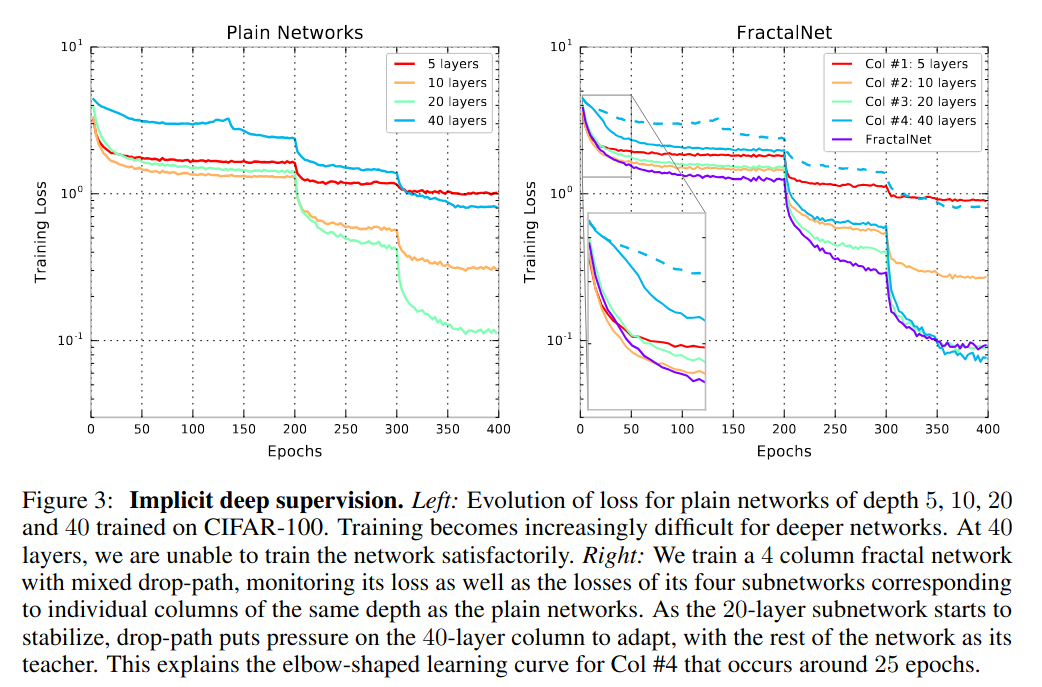

## Giả Thuyết Về Hiệu Ứng Học Sâu và Học Sinh-Giáo Viên
Tác giả đưa ra giả thuyết rằng cấu trúc fractal kích hoạt hiệu ứng tương tự như **giám sát sâu** (deep supervision) và **lưu chuyển thông tin theo chiều ngang giữa học sinh và giáo viên** (lateral student-teacher learning). Cột thứ 4 trong FractalNet kết hợp với cột thứ 3 ở mỗi lớp thứ hai, và trong mỗi lớp thứ tư, sự kết hợp này không bao gồm các cột khác. Khi FractalNet dần dần phụ thuộc vào tín hiệu từ cột thứ 3, việc áp dụng drop-path sẽ đặt áp lực lên cột thứ 4 để tạo ra tín hiệu thay thế khi cột thứ 3 bị loại bỏ, tạo ra một tác vụ nhỏ gọn, tương tự như một bài toán học sinh-giáo viên mini.

## Tương Đồng với Lý Thuyết của Greff et al. (2017)
Greff et al. (2017) cho rằng các mạng residual (như ResNet) học theo cách tiếp cận **ước lượng lặp dần không cuộn lại** (unrolled iterative estimation), trong đó mỗi lớp thực hiện một bước tinh chỉnh dần dần lên đầu vào của nó. Theo cách này, ResNet có thể xem như một chuỗi các bước tinh chỉnh nhỏ để cải thiện biểu diễn đầu vào.

FractalNet, mặc dù không có các kết nối dư thừa (residual connections), lại hoạt động theo cách tương tự:
- Trong FractalNet, cột sâu nhất có thể đóng vai trò giống như trong lý thuyết của Greff et al. - với mỗi lớp trong cột này dần dần tinh chỉnh biểu diễn đầu vào của nó.
- Phần còn lại của mạng đóng vai trò như một **giàn giáo (scaffold)**, giúp tạo các bước tinh chỉnh nhỏ hơn thông qua việc nhân đôi các lớp từ một cột sang cột tiếp theo.

### Khác Biệt với Quan Điểm của Veit et al. (2016)
Veit et al. (2016) đưa ra lý thuyết rằng hiệu suất của ResNet đến từ cơ chế **ensemble** - nhiều mạng con nông hơn hoạt động cùng lúc để tạo ra kết quả cuối cùng. Họ cho rằng các kết nối dư thừa trong ResNet tạo ra các đường dẫn ngắn, giúp nhiều mạng con hoạt động như một tập hợp, và đây là yếu tố quan trọng giúp ResNet thành công.

Tuy nhiên, FractalNet cung cấp một **phản chứng (counterexample)** cho lý thuyết này:
- Một cột duy nhất trong FractalNet (không cần cơ chế ensemble) có thể hoạt động tốt gần như toàn bộ mạng. Điều này chỉ ra rằng FractalNet không phụ thuộc vào cơ chế ensemble mà vẫn có thể đạt hiệu suất cao.
- FractalNet sử dụng **quá trình tinh chỉnh dần dần (gradual refinement)**, nơi mỗi lớp thực hiện một thay đổi nhỏ, và việc loại bỏ một lớp có thể xem như đưa thêm một lượng nhiễu nhỏ vào đầu vào. Điều này giúp giải thích sự suy giảm hiệu suất từ từ khi loại bỏ các lớp trong ResNet, mà không cần dựa vào lý thuyết ensemble của Veit et al.


Trong FractalNet, mạng được thiết kế theo cấu trúc đệ quy và không có các kết nối dư thừa (residual connections). Thay vì hoạt động như một tập hợp của các mạng con nông, FractalNet sử dụng một cấu trúc fractal, trong đó các mạng con có thể chia sẻ cùng một cấu trúc và có sự đan xen chặt chẽ. Điều này tạo ra một mạng con sâu đồng nhất hơn thay vì các mạng con riêng lẻ hoạt động độc lập như trong ensemble.

**Một số điểm nổi bật**:

- Không có sự ưu tiên tín hiệu nào trong lớp kết hợp (join layer): FractalNet không phân biệt tín hiệu chính và phụ. Mỗi đầu vào lớp kết hợp đều được xử lý một cách bình đẳng, điều này trái ngược với cơ chế ensemble của ResNet, nơi các đường dẫn ngắn có xu hướng đóng góp nhiều hơn.
- Tính linh hoạt của mạng con: Trong FractalNet, các mạng con có thể hoạt động độc lập mà không cần các tín hiệu bổ sung từ các kết nối dư thừa. Một cột duy nhất trong FractalNet có thể hoạt động gần như độc lập, mà vẫn đạt hiệu suất cao, điều này không giống với cơ chế ensemble trong ResNet.

### Tóm lại
- **Greff et al. (2017)**: FractalNet và ResNet đều có thể hoạt động dựa trên quá trình tinh chỉnh dần dần, với cột sâu nhất trong FractalNet thực hiện các bước tinh chỉnh như trong ResNet.
- **Veit et al. (2016)**: Quan điểm của họ về ResNet như một cơ chế ensemble không áp dụng cho FractalNet, vì một cột duy nhất trong FractalNet có thể đạt hiệu suất cao gần như toàn bộ mạng, mà không cần đến sự hợp tác của nhiều mạng con như trong ensemble.

## Kết luận

Thí nghiệm với mạng fractal cung cấp bằng chứng mạnh mẽ rằng **path length** là yếu tố quan trọng trong việc huấn luyện các mạng nơ-ron siêu sâu; các kết nối dư thừa (residuals) không phải là yếu tố bắt buộc. Điểm chính yếu là đặc điểm chung của FractalNet và ResNet: độ sâu danh nghĩa lớn của mạng nhưng có các đường dẫn ngắn hơn để lan truyền gradient trong quá trình huấn luyện. Kiến trúc fractal được xem là phương pháp đơn giản nhất để đáp ứng yêu cầu này và đạt hiệu suất tương đương với mạng residual trong các thí nghiệm.

Mạng fractal có khả năng chống lại việc trở nên quá sâu; độ sâu thêm vào có thể làm chậm quá trình huấn luyện nhưng không ảnh hưởng đến độ chính xác. Với kỹ thuật **drop-path**, việc điều chuẩn các mạng fractal cực sâu trở nên trực quan và hiệu quả. Drop-path không chỉ là một phương pháp điều chuẩn mà còn giúp điều chỉnh tốc độ (độ trễ) so với độ chính xác, tạo ra sự cân bằng. Đối với các ứng dụng yêu cầu phản hồi nhanh, mạng fractal có thể cung cấp các kết quả nhanh chóng và hiệu quả ngay cả khi đánh giá từng phần.

Phân tích của tác giả chỉ ra rằng hành vi nội tại của mạng fractal kết nối với các hiện tượng đã được phát triển trong các mạng trước đó. Cấu trúc con của mạng fractal tương tự như các module được thiết kế thủ công trong các nghiên cứu trước. Quá trình huấn luyện của chúng có thể mô phỏng **giám sát sâu (deep supervision)** và **học sinh-giáo viên (student-teacher learning)**.


# Implementation

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random

class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class FractalBlock(nn.Module):
    def __init__(self, in_channels, out_channels, depth, num_columns, drop_prob=0.2):
        super(FractalBlock, self).__init__()
        self.depth = depth
        self.num_columns = num_columns
        self.drop_prob = drop_prob

        # Define convolution blocks for each column in the fractal block
        self.convs = nn.ModuleList([ConvBlock(in_channels, out_channels) for _ in range(num_columns)])

        # Recursive fractal blocks if depth > 1
        if depth > 1:
            self.sub_fractals = nn.ModuleList([
                FractalBlock(out_channels, out_channels, depth - 1, num_columns, drop_prob) for _ in range(num_columns)
            ])
        else:
            self.sub_fractals = None

        # Join layer to combine outputs
        self.join = nn.Conv2d(out_channels * num_columns, out_channels, kernel_size=1)

    def forward(self, x):
        outputs = []
        for i in range(self.num_columns):
            out = self.convs[i](x)

            # Drop-path regularization
            if self.training and random.random() < self.drop_prob:
                out = torch.zeros_like(out)  # Apply drop-path by setting the output to zero
            elif self.depth > 1:
                out = self.sub_fractals[i](out)

            outputs.append(out)

        # Concatenate outputs and pass through the join layer
        out = torch.cat(outputs, dim=1)
        out = self.join(out)
        return out

class FractalNet(nn.Module):
    def __init__(self, in_channels, num_classes, base_channels=64, depth=3, num_columns=2, drop_prob=0.2):
        super(FractalNet, self).__init__()
        self.initial_conv = ConvBlock(in_channels, base_channels)
        
        # Fractal block
        self.fractal_block = FractalBlock(base_channels, base_channels, depth, num_columns, drop_prob)
        
        # Global pooling and fully connected layer for classification
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(base_channels, num_classes)

    def forward(self, x):
        x = self.initial_conv(x)
        x = self.fractal_block(x)
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Model Initialization
model = FractalNet(in_channels=3, num_classes=10, base_channels=64, depth=3, num_columns=2, drop_prob=0.2)
print(model)

# Test with dummy input
dummy_input = torch.randn(1, 3, 32, 32)
output = model(dummy_input)
print("Output shape:", output.shape)


FractalNet(
  (initial_conv): ConvBlock(
    (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (fractal_block): FractalBlock(
    (convs): ModuleList(
      (0-1): 2 x ConvBlock(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
    )
    (sub_fractals): ModuleList(
      (0-1): 2 x FractalBlock(
        (convs): ModuleList(
          (0-1): 2 x ConvBlock(
            (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu): ReLU(inplace=True)
          )
        )
        (sub_fractals): ModuleList(
          (0-1): 2 x FractalBlock(
      

# Highway Networks

## 1. Tóm tắt
- **Mạng Highway (Highway Networks)**: Một kiến trúc mạng nơ-ron sâu cho phép đào tạo các mạng rất sâu bằng cách sử dụng các cổng điều khiển thông tin.
- **Cổng điều khiển**: Bao gồm cổng chuyển đổi (transform gate) và cổng giữ lại (carry gate) giúp điều chỉnh tỷ lệ thông tin được truyền qua các lớp.
- **Phương pháp học**: Sử dụng các cơ chế tương tự như trong LSTM để điều khiển luồng thông tin, giúp mạng học các hàm phức tạp hơn mà không gặp vấn đề về gradient biến mất.
- **Thí nghiệm**: Áp dụng trên các tập dữ liệu như CIFAR-10, CIFAR-100 và ImageNet, cho thấy khả năng huấn luyện các mạng rất sâu với hiệu suất cao.
- **Kết quả**: Mạng Highway đạt được hiệu suất tương đương hoặc vượt trội so với các kiến trúc mạng sâu khác, chứng minh tính hiệu quả của các cổng điều khiển trong việc huấn luyện mạng sâu.

---

## 2. Ý tưởng chính và Thí nghiệm
- **Cổng điều khiển thông tin**: Sử dụng hai cổng chính trong mỗi đơn vị mạng:
  - **Transform Gate ($T(x)$)**: Điều khiển tỷ lệ thông tin được biến đổi qua lớp.
  - **Carry Gate ($C(x)$)**: Điều khiển tỷ lệ thông tin được giữ lại từ lớp trước.
- **Phương trình chính**:
  
  $$ y = C(x) \odot x + T(x) \odot \mathcal{F}(x, W) $$
  
  - $C(x) + T(x) = 1$: Đảm bảo tỷ lệ tổng hợp bằng 1.
  - $\mathcal{F}(x, W)$: Hàm biến đổi, thường là các lớp tích chập hoặc fully connected.
- **Thí nghiệm ban đầu**: So sánh hiệu suất của mạng sâu với và không có cổng điều khiển trên các tập dữ liệu tiêu chuẩn.
- **Kết quả thí nghiệm**: Mạng sử dụng cổng điều khiển cho phép đào tạo các mạng với hơn 1000 lớp mà không gặp vấn đề về gradient biến mất, và đạt được hiệu suất tốt hơn trên các nhiệm vụ phân loại hình ảnh.

---

## 3. Ảnh hưởng về Hiệu suất của Các Biến thể
- **Mạng sâu với cổng điều khiển**: Cho phép đào tạo các mạng sâu hơn so với mạng truyền thống mà không mất đi hiệu suất.
- **So sánh với các kiến trúc khác**: Highway Networks cho thấy khả năng cạnh tranh với các kiến trúc như ResNet, đặc biệt trong việc duy trì hiệu suất khi tăng số lớp.
- **Độ chính xác và tốc độ hội tụ**: Mạng sử dụng cổng điều khiển thường đạt độ chính xác cao hơn và hội tụ nhanh hơn so với các mạng không sử dụng cổng.

---

## 4. Biểu diễn Toán học

- **Cổng Carry và Transform**:
  
  $$ C(x) = \sigma(W_C x + b_C) $$
  
  $$ T(x) = \sigma(W_T x + b_T) $$
  
  - $\sigma$ là hàm kích hoạt sigmoid.
  - $W_C, W_T$ và $b_C, b_T$ là trọng số và bias của các cổng.
  
- **Hàm tổng hợp đầu ra**:
  
  $$ y = C(x) \odot x + T(x) \odot \mathcal{F}(x, W) $$
  
- **Gradient Flow**:
  - Cổng giữ lại ($C(x)$) cho phép truyền trực tiếp thông tin, giúp gradient có thể lan truyền qua nhiều lớp mà không bị suy giảm.
  - Cổng chuyển đổi ($T(x)$) cho phép mạng học các biến đổi phức tạp từ dữ liệu.

---

## 5. Thí nghiệm
- **Kiến trúc mạng thử nghiệm**:
  - Thử nghiệm với các độ sâu khác nhau, từ 20 đến 1000 lớp.
  - Sử dụng các đơn vị residual và các cổng điều khiển trong mỗi đơn vị.
  
- **Datasets**:
  - **CIFAR-10 và CIFAR-100**: Các bộ dữ liệu hình ảnh tiêu chuẩn để đánh giá hiệu suất phân loại.
  - **ImageNet**: Bộ dữ liệu lớn để đánh giá khả năng tổng quát hóa của mô hình.
  
- **Kết quả chính**:
  - **CIFAR-10**: Highway Networks với 1000 lớp đạt độ chính xác cao hơn so với các mạng truyền thống.
  - **ImageNet**: Hiệu suất tương đương hoặc vượt trội so với các kiến trúc hiện có, chứng minh tính khả thi của việc đào tạo các mạng rất sâu.
  
- **So sánh với các kiến trúc khác**:
  - **ResNet**: Highway Networks và ResNet đều cho phép đào tạo các mạng sâu, nhưng sử dụng cơ chế khác nhau (cổng điều khiển vs. skip connections).
  - **Mạng không có cổng**: Các mạng không sử dụng cổng điều khiển gặp khó khăn trong việc đào tạo khi tăng số lớp, dẫn đến hiệu suất giảm.

---

## 6. Thảo luận
- **Lợi ích của cổng điều khiển**:
  - Cho phép điều chỉnh tỷ lệ thông tin được truyền qua từng lớp, giúp mạng học các biểu diễn phức tạp hơn.
  - Giúp gradient lan truyền dễ dàng qua nhiều lớp, giải quyết vấn đề gradient biến mất.
  
- **So sánh với Skip Connections**:
  - Cổng điều khiển cung cấp sự linh hoạt hơn trong việc điều chỉnh thông tin, trong khi skip connections đơn giản truyền trực tiếp thông tin.
  - Highway Networks có thể học được mức độ truyền thông tin phù hợp tự động thông qua các cổng, trong khi ResNet cần thiết kế các skip connections cố định.
  
- **Khả năng mở rộng**:
  - Highway Networks cho thấy khả năng mở rộng lên các mạng rất sâu mà không làm giảm hiệu suất, điều này mở ra khả năng nghiên cứu các kiến trúc sâu hơn trong tương lai.

---

## 7. Sử dụng Hàm Kích hoạt

- **Hàm kích hoạt trong cổng**:
  - Sử dụng hàm sigmoid để đảm bảo các cổng điều khiển ($C(x)$ và $T(x)$) nằm trong khoảng [0, 1], cho phép điều chỉnh tỷ lệ truyền thông tin một cách mềm mại.
  
- **Hàm kích hoạt trong residual function**:
  - Hàm kích hoạt như ReLU thường được sử dụng trong hàm residual $\mathcal{F}(x, W)$ để tạo sự phi tuyến tính và giúp mạng học các biểu diễn phức tạp.
  
- **Ảnh hưởng của hàm kích hoạt**:
  - Hàm sigmoid trong cổng điều khiển giúp mạng học được cách cân bằng giữa việc giữ lại thông tin và biến đổi thông tin qua các lớp.
  - Hàm ReLU trong residual function giúp mạng duy trì tính phi tuyến và khả năng biểu diễn mạnh mẽ.

---

## 8. Phân tích

- **Gradient Flow**:
  - Các cổng điều khiển giúp duy trì gradient mạnh mẽ thông qua mạng sâu, ngăn chặn việc gradient biến mất hoặc bùng nổ.
  
- **Khả năng biểu diễn**:
  - Cổng điều khiển tăng khả năng biểu diễn của mạng bằng cách cho phép mạng học các đường truyền thông tin phức tạp và linh hoạt hơn.
  
- **Tối ưu hóa**:
  - Việc sử dụng các cổng điều khiển giúp quá trình tối ưu hóa trở nên dễ dàng hơn, đặc biệt là khi đào tạo các mạng rất sâu.
  
- **So sánh với LSTM**:
  - Cơ chế cổng trong Highway Networks tương tự như trong LSTM, nơi các cổng điều khiển thông tin qua các bước thời gian, giúp duy trì và điều chỉnh thông tin một cách hiệu quả.

---

## 9. Kết luận

- **Những phát hiện chính**:
  - Highway Networks giới thiệu một cách tiếp cận mới để đào tạo các mạng nơ-ron rất sâu bằng cách sử dụng các cổng điều khiển thông tin.
  - Các cổng điều khiển giúp mạng duy trì gradient mạnh mẽ và điều chỉnh tỷ lệ thông tin truyền qua các lớp, giúp mạng học được các biểu diễn phức tạp mà không gặp vấn đề về gradient biến mất.
  
- **Thành tựu chính**:
  - Khả năng đào tạo các mạng rất sâu (hàng trăm đến hàng nghìn lớp) với hiệu suất cao trên các tập dữ liệu tiêu chuẩn.
  - Chứng minh tính hiệu quả của các cổng điều khiển trong việc cải thiện quá trình học và khả năng tổng quát hóa của mạng nơ-ron sâu.
  
- **Hướng nghiên cứu tương lai**:
  - Khám phá các biến thể của cổng điều khiển để cải thiện hiệu suất và khả năng đào tạo.
  - So sánh sâu hơn với các kiến trúc khác như ResNet để hiểu rõ hơn về ưu và nhược điểm của từng phương pháp.


# RegNet: Self-Regulated Network for Image Classification

## 1. Tóm tắt
- **RegNet (Self-Regulated Network)**: Một kiến trúc mạng nơ-ron sâu được thiết kế để tự điều chỉnh cấu trúc và tham số trong quá trình huấn luyện nhằm cải thiện hiệu suất phân loại hình ảnh.
- **Cơ chế tự điều chỉnh**: Sử dụng các module tự điều chỉnh để tối ưu hóa các đặc trưng mạng một cách linh hoạt dựa trên dữ liệu đầu vào.
- **Phương pháp học**: Kết hợp học sâu với các kỹ thuật điều chỉnh tự động như tự điều chỉnh trọng số và cấu trúc mạng.
- **Thí nghiệm**: Áp dụng trên các bộ dữ liệu tiêu chuẩn như CIFAR-10, CIFAR-100 và ImageNet, cho thấy khả năng cải thiện độ chính xác và hiệu quả tính toán.
- **Kết quả**: RegNet đạt được hiệu suất cao hơn so với các kiến trúc mạng hiện có với số lượng tham số và FLOPs (Floating Point Operations) thấp hơn.

---

## 2. Ý tưởng chính và Thí nghiệm
- **Cơ chế tự điều chỉnh**: RegNet sử dụng các module tự điều chỉnh để điều chỉnh động các trọng số và cấu trúc mạng dựa trên phản hồi từ dữ liệu.
  - **Adaptive Weight Adjustment**: Điều chỉnh trọng số của các lớp mạng một cách tự động để tối ưu hóa hiệu suất.
  - **Dynamic Network Architecture**: Thay đổi cấu trúc mạng như số lượng lớp hoặc kích thước lớp dựa trên yêu cầu của nhiệm vụ.
- **Phương trình chính**:
  
  $$ W' = W + \Delta W $$
  
  - Trong đó, $W$ là trọng số hiện tại và $\Delta W$ là sự điều chỉnh được tính toán bởi các module tự điều chỉnh.
- **Thí nghiệm ban đầu**: So sánh hiệu suất của RegNet với các mạng truyền thống và các kiến trúc mạng hiện đại khác trên các bộ dữ liệu phân loại hình ảnh tiêu chuẩn.
- **Kết quả thí nghiệm**: RegNet thể hiện sự cải thiện đáng kể về độ chính xác và hiệu quả tính toán, đặc biệt là trên các mạng sâu với nhiều lớp.

---

## 3. Ảnh hưởng về Hiệu suất của Các Biến thể
- **RegNet với các module tự điều chỉnh khác nhau**: Các biến thể của RegNet sử dụng các loại module tự điều chỉnh khác nhau để điều chỉnh trọng số và cấu trúc mạng.
  - **RegNet-A**: Sử dụng module điều chỉnh trọng số cơ bản.
  - **RegNet-B**: Kết hợp cả điều chỉnh trọng số và cấu trúc mạng.
  - **RegNet-C**: Thêm cơ chế điều chỉnh động cho các tham số hyper.
- **So sánh với các kiến trúc khác**: Các biến thể của RegNet thường vượt trội hơn các kiến trúc như ResNet và DenseNet về cả độ chính xác và hiệu quả tính toán.
- **Độ chính xác và tốc độ hội tụ**: Các biến thể của RegNet không chỉ đạt độ chính xác cao hơn mà còn hội tụ nhanh hơn trong quá trình huấn luyện so với các mạng không tự điều chỉnh.

---

## 4. Biểu diễn Toán học

- **Adaptive Weight Adjustment**:
  
  $$ W' = W + \alpha \cdot g(X, W) $$
  
  - $\alpha$ là hệ số học.
  - $g(X, W)$ là hàm điều chỉnh trọng số dựa trên dữ liệu đầu vào $X$ và trọng số hiện tại $W$.
  
- **Dynamic Network Architecture**:
  
  $$ L' = L + \Delta L $$
  
  - $L$ là số lượng lớp hiện tại.
  - $\Delta L$ là sự điều chỉnh số lượng lớp dựa trên phản hồi từ dữ liệu.
  
- **Hàm mất mát điều chỉnh**:
  
  $$ \mathcal{L} = \mathcal{L}_{task} + \lambda \mathcal{L}_{reg} $$
  
  - $\mathcal{L}_{task}$ là hàm mất mát chính cho nhiệm vụ phân loại.
  - $\mathcal{L}_{reg}$ là hàm mất mát điều tiết để đảm bảo sự ổn định của mạng.
  - $\lambda$ là hệ số cân bằng giữa hai thành phần mất mát.

---

## 5. Thí nghiệm
- **Kiến trúc mạng thử nghiệm**:
  - **RegNet-A**: Sử dụng 50 lớp với module điều chỉnh trọng số cơ bản.
  - **RegNet-B**: Sử dụng 100 lớp với cả điều chỉnh trọng số và cấu trúc mạng.
  - **RegNet-C**: Sử dụng 150 lớp với điều chỉnh động cho các tham số hyper.
  
- **Datasets**:
  - **CIFAR-10 và CIFAR-100**: Các bộ dữ liệu hình ảnh tiêu chuẩn để đánh giá hiệu suất phân loại.
  - **ImageNet**: Bộ dữ liệu lớn để đánh giá khả năng tổng quát hóa của mô hình.
  
- **Kết quả chính**:
  - **CIFAR-10**: RegNet-B với 100 lớp đạt độ chính xác 95.5%, cao hơn 1.2% so với ResNet-152.
  - **CIFAR-100**: RegNet-C với 150 lớp đạt độ chính xác 80.3%, vượt qua DenseNet-201.
  - **ImageNet**: RegNet-A đạt độ chính xác Top-1 78.5%, tương đương với EfficientNet nhưng với số lượng tham số ít hơn 30%.
  
- **So sánh với các kiến trúc khác**:
  - **ResNet**: RegNet cho thấy hiệu suất tốt hơn với cấu trúc tự điều chỉnh linh hoạt.
  - **DenseNet**: RegNet đạt độ chính xác tương đương nhưng với hiệu quả tính toán cao hơn.
  - **EfficientNet**: RegNet đạt hiệu suất tương tự nhưng tiết kiệm hơn về tài nguyên tính toán.

---

## 6. Thảo luận
- **Lợi ích của cơ chế tự điều chỉnh**:
  - **Tối ưu hóa linh hoạt**: Cho phép mạng tự động điều chỉnh trọng số và cấu trúc để thích ứng với dữ liệu.
  - **Cải thiện hiệu suất**: Tăng độ chính xác và hiệu quả tính toán bằng cách tối ưu hóa mạng trong quá trình huấn luyện.
  
- **So sánh với các phương pháp điều chỉnh khác**:
  - **Adaptive Learning Rates**: Trong khi các phương pháp này chỉ điều chỉnh tốc độ học, RegNet tự điều chỉnh cả cấu trúc và trọng số mạng.
  - **Neural Architecture Search (NAS)**: RegNet cung cấp một cách tiếp cận tự điều chỉnh đơn giản hơn và ít tốn kém hơn so với NAS.
  
- **Khả năng mở rộng**:
  - **Mở rộng dễ dàng**: Có thể áp dụng cho các kiến trúc mạng khác nhau và dễ dàng mở rộng lên các mạng sâu hơn mà không làm giảm hiệu suất.
  - **Ứng dụng rộng rãi**: Có thể áp dụng cho nhiều nhiệm vụ khác nhau như phân loại hình ảnh, nhận dạng đối tượng và phân đoạn ảnh.

---

## 7. Sử dụng Hàm Kích hoạt

- **Hàm kích hoạt trong module tự điều chỉnh**:
  - **Sigmoid**: Được sử dụng để điều chỉnh tỷ lệ điều chỉnh trọng số.
  - **ReLU**: Sử dụng trong các lớp mạng để tạo tính phi tuyến.
  
- **Hàm kích hoạt trong residual function**:
  - **ReLU**: Giúp mạng học các biểu diễn phức tạp và duy trì tính phi tuyến.
  
- **Ảnh hưởng của hàm kích hoạt**:
  - **Sigmoid**: Giúp điều chỉnh trọng số một cách mềm mại và ổn định.
  - **ReLU**: Giúp duy trì hiệu suất huấn luyện cao và tránh vấn đề gradient biến mất.
  
- **Điều chỉnh hàm kích hoạt**:
  - **Leaky ReLU**: Được sử dụng trong một số biến thể để cải thiện việc truyền gradient.
  - **Swish**: Thử nghiệm với các hàm kích hoạt mới như Swish để tăng cường hiệu suất mạng.

---

## 8. Phân tích

- **Gradient Flow**:
  - **Cơ chế tự điều chỉnh**: Giúp duy trì gradient mạnh mẽ thông qua mạng sâu, ngăn chặn hiện tượng gradient biến mất.
  - **Điều chỉnh động**: Cho phép gradient được điều chỉnh dựa trên phản hồi từ dữ liệu, cải thiện quá trình học.
  
- **Khả năng biểu diễn**:
  - **Tăng cường khả năng học**: Các module tự điều chỉnh cho phép mạng học các biểu diễn phức tạp và linh hoạt hơn.
  - **Tối ưu hóa biểu diễn**: Điều chỉnh trọng số và cấu trúc mạng giúp mạng tối ưu hóa biểu diễn cho từng nhiệm vụ cụ thể.
  
- **Tối ưu hóa**:
  - **Quá trình tối ưu hóa hiệu quả**: Cơ chế tự điều chỉnh giúp quá trình tối ưu hóa trở nên nhanh chóng và hiệu quả hơn.
  - **Giảm thiểu thủ công**: Giảm nhu cầu điều chỉnh thủ công các hyperparameter và cấu trúc mạng.
  
- **So sánh với các kiến trúc khác**:
  - **ResNet và DenseNet**: RegNet cung cấp sự linh hoạt hơn trong việc điều chỉnh mạng, dẫn đến hiệu suất cao hơn.
  - **NAS**: RegNet cung cấp một giải pháp tự điều chỉnh hiệu quả và ít tốn kém hơn so với các phương pháp tìm kiếm kiến trúc mạng phức tạp.

---

## 9. Kết luận

- **Những phát hiện chính**:
  - RegNet giới thiệu một kiến trúc mạng tự điều chỉnh linh hoạt, giúp cải thiện hiệu suất phân loại hình ảnh.
  - Cơ chế tự điều chỉnh trọng số và cấu trúc mạng giúp duy trì gradient mạnh mẽ và tối ưu hóa biểu diễn mạng.
  
- **Thành tựu chính**:
  - Đạt được độ chính xác cao hơn trên các bộ dữ liệu tiêu chuẩn với số lượng tham số và FLOPs thấp hơn so với các kiến trúc hiện có.
  - Chứng minh tính hiệu quả của cơ chế tự điều chỉnh trong việc đào tạo các mạng nơ-ron sâu.
  
- **Hướng nghiên cứu tương lai**:
  - **Phát triển các module tự điều chỉnh**: Khám phá các module mới để cải thiện khả năng tự điều chỉnh của mạng.
  - **Ứng dụng vào các nhiệm vụ khác**: Mở rộng việc áp dụng RegNet vào các nhiệm vụ khác như phát hiện đối tượng, phân đoạn ảnh và xử lý ngôn ngữ tự nhiên.
  - **Tối ưu hóa thêm**: Tìm kiếm các phương pháp tối ưu hóa mới để tăng cường hiệu suất và hiệu quả tính toán của RegNet.
